In [41]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [443]:
features = pd.read_csv('../data/strokes.csv', delimiter=";")
features.describe()
features.head(2)
df = pd.read_csv('../data/strokesM.csv', delimiter=";")
df.describe()


,sess,slabel,t,x,y,v,vd,th,w,c,cs,Unnamed: 11
count,2.101960e+05,210196.000000,210196.000000,210196.00000,210196.000000,201917.000000,1.936380e+05,201917.000000,193638.000000,193638.000000,193638.000000,0
mean,1.426935e+09,5223.773968,908135.129181,684.92124,371.858123,1023.321791,6.468731e+05,0.663020,41.823155,0.020890,0.045202,NaN
std,2.023761e+06,2910.464153,1434005.801433,348.95384,179.193511,8606.808310,1.074387e+08,1.966860,366.188414,0.402966,0.085746,NaN
min,1.424664e+09,1.000000,83.490204,0.00000,0.000000,0.000000,-3.488067e+08,-9.424778,0.000000,-3.141593,0.000000,NaN
25%,1.424768e+09,2610.000000,3687.413520,407.00000,252.000000,178.177803,-1.875313e+04,-0.321751,0.000000,-0.003858,0.000000,NaN
50%,1.428470e+09,5479.000000,677751.869905,676.00000,383.000000,408.933313,-5.014857e+00,0.000000,10.395406,0.000000,0.010239,NaN
75%,1.428884e+09,7770.000000,777596.659139,942.00000,499.000000,975.348151,1.612806e+04,2.356194,40.294432,0.004741,0.058824,NaN
max,1.428884e+09,9957.000000,4664730.374672,1466.00000,881.000000,1443727.698303,3.901875e+10,17.278760,119887.840546,3.141593,4.000000,NaN


In [444]:
df.count()

sess           210196
slabel         210196
t              210196
x              210196
y              210196
v              201917
vd             193638
th             201917
w              193638
c              193638
cs             193638
Unnamed: 11         0
dtype: int64

In [449]:
len(list(df['w'].index[df['w'].apply(np.isnan)]))

16558

,sess,slabel,t,x,y,v,vd,th,w,c,cs,Unnamed: 11
0,1424664435,1,671362.936800,957,67,973.520563,116435.089574,2.446854,17.866265,0.009374,0.032075,NaN
1,1424664435,1,671362.944823,951,72,1905.999542,-69143.735334,2.589938,4.547817,-0.003360,0.008824,NaN


In [426]:
print len(features.x[0]), len(features.y[0])

122 117


In [476]:
xlen=[len(features.x[i].split(',')) for i in features.index]
ylen=[len(features.y[i].split(',')) for i in features.index]
tlen=[len(features.t[i].split(',')) for i in features.index]
vlen=[len(features.v[i].split(',')) for i in features.index]
print len(xlen), len(ylen), len(tlen), len(vlen)

8279 8279 8279 8279


In [477]:
features['xlen']=xlen
features['ylen']=ylen
features['tlen']=tlen
features['vlen']=vlen

In [475]:
len(features.x[8273].split(','))

11

In [493]:
#features[features.xlen <> features.ylen]
features[['x','xlen','y','ylen','t','tlen','v','vlen']].head()

,x,xlen,y,ylen,t,tlen,v,vlen
0,"[957,951,938,929,914,892,859,818,775,736,692,6...",31,"[67,72,80,86,95,107,126,145,163,188,210,235,25...",31,"[671362.93680039374,671362.94482307963,671362....",31,"[973.52056260835445,1905.9995416730944,1353.38...",30
1,"[536,540,544,552,560,569,578,588,596,603,606,6...",36,"[349,349,349,349,347,345,342,339,337,334,334,3...",36,"[671363.26486538269,671363.2728991874,671363.2...",36,"[497.89609574180105,500.82865279448191,999.997...",35
2,"[653,653,652,651,651,650,]",7,"[318,318,318,318,318,319,]",7,"[671363.64895788475,671363.66479798523,671363....",7,"[0,123.12389386708335,62.984673813088776,0,176...",6
3,"[646,645,648,656,664,671,678,682,682,681,681,6...",13,"[320,320,321,324,328,330,333,333,333,327,321,3...",13,"[671363.77688850649,671363.79220050643,671363....",13,"[65.308255198139534,206.52283643765207,557.993...",12
4,"[681,679,678,677,676,675,675,675,675,675,675,6...",44,"[309,303,299,295,291,288,284,281,277,273,269,2...",44,"[671364.54483573802,671364.55271473411,671364....",44,"[802.71080909898069,517.32265790376289,505.655...",43


sess    210197
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab06781cd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fab0661c5d0>]], dtype=object)

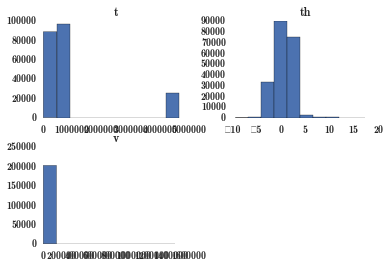

In [465]:
df[['t','v','th']].hist()

TypeError: Empty 'Series': no numeric data to plot

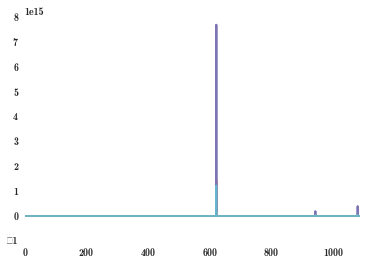

In [191]:
for i in gp.columns:
    gp.ix[:,i].plot()

In [190]:
    gp.ix[:,7].plot()

Index([u'session', u'slabel', u'vxcount', u'vxmin', u'vxmax', u'vxavg', u'vxsd', u'vxrange', u'vxwavg', u'vxwsd', u'vycount', u'vymin', u'vymax', u'vyavg', u'vysd', u'vyrange', u'vywavg', u'vywsd', u'vcount', u'vmin', u'vmax', u'vavg', u'vsd', u'vrange', u'vwavg', u'vwsd', u'vdcount', u'vdmin', u'vdmax', u'vdavg', u'vdsd', u'vdrange', u'vdwavg', u'vdwsd', u'vddcount', u'vddmin', u'vddmax', u'vddavg', u'vddsd', u'vddrange', u'vddwavg', u'vddwsd', u'thcount', u'thmin', u'thmax', u'thavg', u'thsd', u'thrange', u'thwavg', u'thwsd', u'wcount', u'wmin', u'wmax', u'wavg', u'wsd', u'wrange', u'wwavg', u'wwsd', u'ccount', u'cmin', u'cmax', u'cavg', u'csd', u'crange', u'cwavg', u'cwsd', u'cdcount', u'cdmin', u'cdmax', u'cdavg', u'cdsd', u'cdrange', u'cdwavg', u'cdwsd', u'cscount', u'csmin', u'csmax', u'csavg', u'cssd', u'csrange', u'cswavg', u'cswsd', u's', u'dur', u'straight', u'npause', u'tpause', u'rpause', u'ncp', u'dragging', u'Unnamed: 90'], dtype='object')

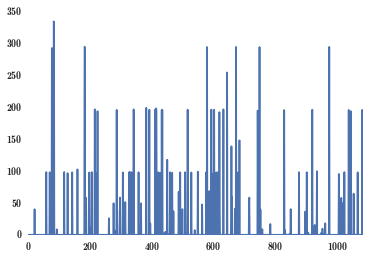

In [189]:
    gp.ix[:,'wmin'].plot()

In [185]:
gp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086 entries, 0 to 1085
Data columns (total 91 columns):
session        1086 non-null int64
slabel         1086 non-null int64
vxcount        1086 non-null int64
vxmin          1086 non-null float64
vxmax          1086 non-null float64
vxavg          1086 non-null float64
vxsd           1086 non-null float64
vxrange        1086 non-null float64
vxwavg         1086 non-null float64
vxwsd          1086 non-null float64
vycount        1086 non-null int64
vymin          1086 non-null float64
vymax          1086 non-null float64
vyavg          1086 non-null float64
vysd           1086 non-null float64
vyrange        1086 non-null float64
vywavg         1086 non-null float64
vywsd          1086 non-null float64
vcount         1086 non-null int64
vmin           1086 non-null float64
vmax           1086 non-null float64
vavg           1086 non-null float64
vsd            1086 non-null float64
vrange         1086 non-null float64
vwavg          